In [ ]:
# Analyzing Weather Data from OpenWeatherMap API 
import requests

API_KEY = '18653964667b3804b646e43ad73eed2e'
LOCATION = 'Pune, India'  # Example location
BASE_URL = 'http://api.openweathermap.org/data/2.5/forecast'

# Fetch data
params = {
    'q': LOCATION,
    'appid': API_KEY,
    'units': 'metric'  # Use 'imperial' for Fahrenheit
}
response = requests.get(BASE_URL, params=params)
data = response.json()

# Check for successful response
if response.status_code == 200:
    print("Data retrieved successfully!")
else:
    print(f"Failed to retrieve data: {response.status_code}")


Data retrieved successfully!


In [2]:
import pandas as pd

# Extract weather data points
weather_data = {
    'date': [],
    'temperature': [],
    'humidity': [],
    'wind_speed': [],
    'precipitation': []
}

for entry in data['list']:
    weather_data['date'].append(entry['dt_txt'])
    weather_data['temperature'].append(entry['main']['temp'])
    weather_data['humidity'].append(entry['main']['humidity'])
    weather_data['wind_speed'].append(entry['wind']['speed'])
    # Some data points may lack precipitation; handle accordingly
    weather_data['precipitation'].append(entry.get('rain', {}).get('3h', 0))

# Convert to DataFrame
df = pd.DataFrame(weather_data)
df['date'] = pd.to_datetime(df['date'])


In [3]:
# Fill missing precipitation values with 0
df['precipitation'].fillna(0, inplace=True)
print(df.info())  # Verify data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           40 non-null     datetime64[ns]
 1   temperature    40 non-null     float64       
 2   humidity       40 non-null     int64         
 3   wind_speed     40 non-null     float64       
 4   precipitation  40 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.7 KB
None


C:\Users\bargi\AppData\Local\Temp\ipykernel_2516\2865120957.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['precipitation'].fillna(0, inplace=True)


In [4]:
average_temp = df['temperature'].mean()
max_temp = df['temperature'].max()
min_temp = df['temperature'].min()

print(f"Average Temperature: {average_temp:.2f}°C")
print(f"Max Temperature: {max_temp:.2f}°C")
print(f"Min Temperature: {min_temp:.2f}°C")


Average Temperature: 26.02°C
Max Temperature: 31.72°C
Min Temperature: 20.62°C


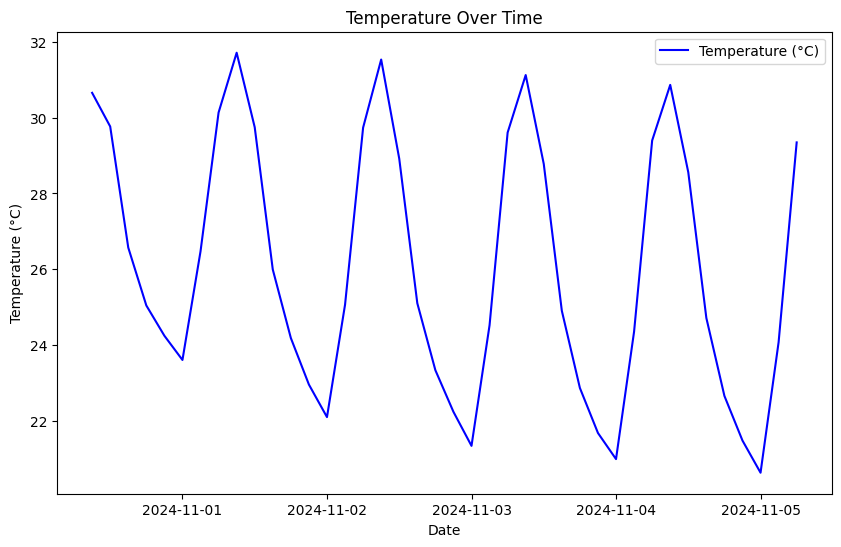

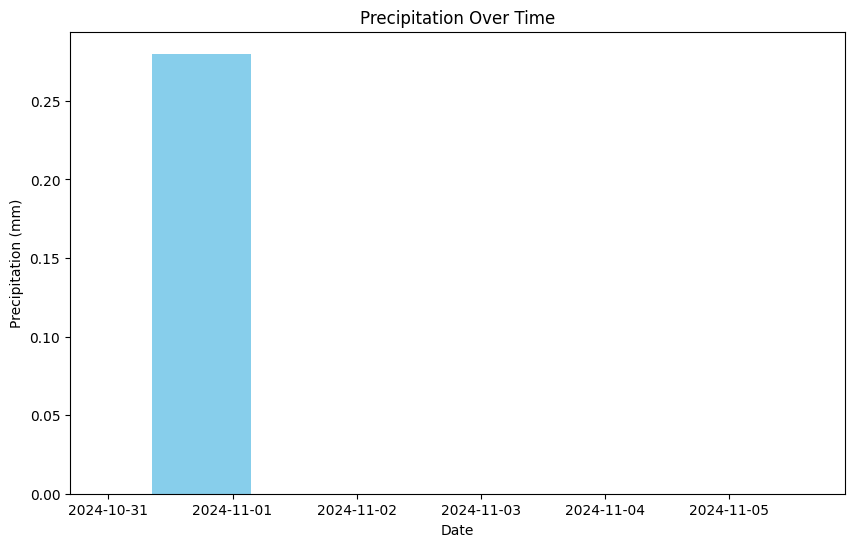

In [5]:
import matplotlib.pyplot as plt

# Line plot for temperature changes over time
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temperature'], label='Temperature (°C)', color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

# Bar plot for precipitation levels
plt.figure(figsize=(10, 6))
plt.bar(df['date'], df['precipitation'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Over Time')
plt.show()


In [6]:
# Aggregation by day
df_daily = df.resample('D', on='date').mean()

# Monthly aggregation
df_monthly = df.resample('M', on='date').mean()
print(df_monthly[['temperature', 'humidity', 'wind_speed', 'precipitation']])


            temperature  humidity  wind_speed  precipitation
date                                                        
2024-10-31    27.256000      58.8    1.984000          0.056
2024-11-30    25.846857      45.8    1.928857          0.000


C:\Users\bargi\AppData\Local\Temp\ipykernel_2516\432914786.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M', on='date').mean()
